In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from PIL import Image


In [4]:
!wget https://upload.wikimedia.org/wikipedia/commons/7/76/Stanley_Park_Labeled_Aerial_Map.png
im = Image.open('Stanley_Park_Labeled_Aerial_Map.png')

--2023-03-19 14:45:17--  https://upload.wikimedia.org/wikipedia/commons/7/76/Stanley_Park_Labeled_Aerial_Map.png
Resolving upload.wikimedia.org (upload.wikimedia.org)... 2620:0:863:ed1a::2:b, 198.35.26.112
Connecting to upload.wikimedia.org (upload.wikimedia.org)|2620:0:863:ed1a::2:b|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1189400 (1.1M) [image/png]
Saving to: 'Stanley_Park_Labeled_Aerial_Map.png.4'

Stanley_Park_Labele 100%[===================>]   1.13M  4.29MB/s    in 0.3s    

2023-03-19 14:45:18 (4.29 MB/s) - 'Stanley_Park_Labeled_Aerial_Map.png.4' saved [1189400/1189400]



In [8]:
# Sobel filters, used for edge detection

# Intensity increases from left to right
sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
# Alternate sobel_x is [[1, 0, -1], [2, 0, -2], [1, 0, -1]]
# In the alternate, intensity increases from right to left

# Intensity increases from top to bottom
sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
# Alternate sobel_y is [[1, 2, 1], [0, 0, 0], [-1, -2, -1]]
# In the alternate, intensity increases from bottom to top

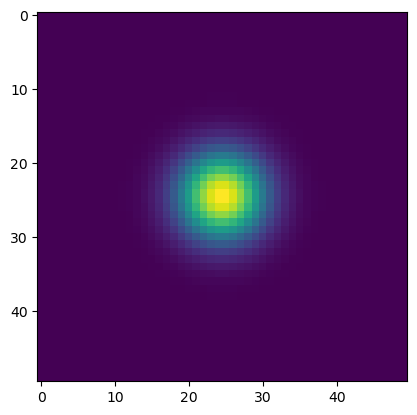

In [18]:
# Implement Edge Detection
# Step 1: convolve filter x and filter y with grayscale image to obtain gx and gy
# Step 2; compute the magnitude of the gradient as sqrt(gx^2 + gy^2)

gray = np.mean(im,axis=2)
x = np.linspace(-6,6,50)
fx = norm.pdf(x,0,1)
filt = np.outer(fx,fx)
plt.imshow(filt);  # Plot the image in grayscale

from scipy.signal import convolve2d


gx = convolve2d(gray, sobel_x)
gy = convolve2d(gray, sobel_y)
mag = np.sqrt(gx**2 + gy**2)
